<a href="https://colab.research.google.com/github/farnazalamahmed99-cmu/3D_Reconstruction_CV/blob/main/farnazaa_hw2_Homographies_release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Augmented Reality with Planar Homographies

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.

# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Preliminaries

## Q1.1 The Direct Linear Transform


### Q1.1.1 (3 points)

How many degrees of freedom does **h** have?

---

YOUR ANSWER HERE...

The homography matrix H is a 3×3 matrix with 9 elements. Since the relationship x1i≡Hx2i is an equivalence (equality up to an arbitrary scale factor), the homography is defined only up to that scale.

Therefore, H (and its vector form h) has 8 independent degrees of freedom (9 elements minus 1 scale factor).
---

### Q1.1.2 (2 points)

How many point pairs are required to solve **h**?

---

> Add blockquote



YOUR ANSWER HERE...
Since the homography vector h has 8 degrees of freedom, and each point correspondence provides 2 independent constraints (for the x and y coordinates), the minimum number of point pairs required to uniquely determine h is  
2 constraints per point
8 degrees of freedom
​
 =4 pairs of points.

---

### Q1.1.3 (5 points)

Derive $\textbf{A}_i$

---

YOUR ANSWER HERE...
The homography relationship states that the corresponding points are equal up to an unknown scale factor, $\textbf{λ}$:
$$\mathbf{x}_{1}^{i} = \lambda \mathbf{H}\mathbf{x}_{2}^{i}$$
The points in homogeneous coordinates are

$$\mathbf{x}_{1}^{i} = \begin{pmatrix} x_{1}^{i} \\ y_{1}^{i} \\ 1 \end{pmatrix}$$
and
$$\mathbf{x}_{2}^{i} = \begin{pmatrix} x_{2}^{i} \\ y_{2}^{i} \\ 1 \end{pmatrix}$$

Let the result of the matrix multiplication be $$\mathbf{H}\mathbf{x}_{2}^{i} = \begin{pmatrix} x'_{2} \\ y'_{2} \\ w'_{2} \end{pmatrix}$$

x-coordinate constraint:
$$x_{1}^{i} = \frac{x'_{2}}{w'_{2}} \quad \Rightarrow \quad x'_{2} - x_{1}^{i}w'_{2} = 0$$
y-coordinate constraint:
$$y_{1}^{i} = \frac{y'_{2}}{w'_{2}} \quad \Rightarrow \quad y'_{2} - y_{1}^{i}w'_{2} = 0$$

The constraints that lead to the two rows of $\textbf{A}_i$ are:
$$(\mathbf{H}\mathbf{x}_{2}^{i})_{1} - x_{1}^{i}(\mathbf{H}\mathbf{x}_{2}^{i})_{3} = 0$$
$$(\mathbf{H}\mathbf{x}_{2}^{i})_{2} - y_{1}^{i}(\mathbf{H}\mathbf{x}_{2}^{i})_{3} = 0$$

The final matrix is:
$$\mathbf{A}_i = \begin{pmatrix}
-x_{2}^{i} & -y_{2}^{i} & -1 & 0 & 0 & 0 & x_{1}^{i}x_{2}^{i} & x_{1}^{i}y_{2}^{i} & x_{1}^{i} \\
0 & 0 & 0 & -x_{2}^{i} & -y_{2}^{i} & -1 & y_{1}^{i}x_{2}^{i} & y_{1}^{i}y_{2}^{i} & y_{1}^{i}
\end{pmatrix}$$

---

### Q1.1.4 (5 points)

What will be the trivial solution for **h**? Is the matrix **A** full rank? Why/Why not? What impact will it have on the singular values (i.e. eigenvalues of $\textbf{A}^T\textbf{A}$)?

---

YOUR ANSWER HERE...

The trivial solution for the homogeneous linear system Ah=0 is the zero vector:

h=0

No, the matrix is not full rank.
The homography H (and its vector form h) has only 8 independent degrees of freedom because the relationship $\textbf{x}_1^{i}≡\textbf{H}\textbf{x}_2^{i}$

   is defined up to a scale factor. To ensure a non-trivial solution (h
=0) exists, the matrix A must have a null space of at least dimension one. Therefore, the rank of A must be rank(A)≤8.

Since A is not full rank (its rank is 8, not 9), one of its singular values will be zero. The non-trivial homography vector h is the singular vector of A corresponding to this smallest (zero) singular value.
---

## Q1.2 Homography Theory Questions

### Q1.2.1 (5 points)

Prove that there exists a homography **H** that satisfies $\textbf{x}_1 ≡ \textbf{Hx}_2$, given two cameras separated by a pure rotation.

Given the camera projection equations:
$$\textbf{x}_1 \equiv \textbf{K}_1\textbf{[I|0]}\textbf{X} \\
\textbf{x}_2 \equiv \textbf{K}_2\textbf{[R|0]}\textbf{X}$$

Let $\textbf{X}_{C1}$be the 3D world point in the first camera’s frame. Since translation is zero, the projections simplify to:
$$\mathbf{x}_1 \equiv \textbf{K}_1 \mathbf{X}_{C1}$$ \
$$\mathbf{x}_2 \equiv \textbf{K}_2\textbf{R} \mathbf{X}_{C1}$$

Hence,
  $$\mathbf{X}_{C1}\equiv\textbf{K}_1^{-1}\textbf{x}_1$$
  Substitue $\textbf{X}_{C1}$ into $\mathbf{x}_2$ \
  $$\mathbf{x}_2\equiv(\textbf{K}_2\textbf{R}\textbf{K}_1^{-1})\textbf{x}_1$$

  Isolate $\textbf{x}_1$ to define to define the $\textbf{H}$ where
  $$\mathbf{x}_1\equiv(\textbf{K}_1\textbf{R}^{-1}\textbf{K}_2^{-1})\textbf{x}_2$$
Hence,
$$\textbf{H}=\textbf{K}_1\textbf{R}^{-1}\textbf{K}_2^{-1}$$
  



---

### Q1.2.2 (5 points):

Show that $\textbf{H}^2$ is the homography corresponding to a rotation of 2$\theta$.

---

YOUR ANSWER HERE...
Since, the problem is same as in 1.2.1 because rotating the same camera is equivalent to placing two cameras at an angle. Given
$$\textbf{K}_1=\textbf{K}_2=\textbf{K}$$
 $$\mathbf{x}_2\equiv(\textbf{K}\textbf{R}\textbf{K}^{-1})\textbf{x}_1$$

$$\textbf{H}^2=(\textbf{K}\textbf{R($\theta$)}\textbf{K}^{-1})(\textbf{K}\textbf{R($\theta$)}\textbf{K}^{-1})=\textbf{K}\textbf{R(2$\theta$)}\textbf{K}^{-1}$$

 $$\mathbf{R}^2(\theta) = \begin{pmatrix}
(\cos\theta\cos\theta - \sin\theta\sin\theta) & (-\cos\theta\sin\theta - \sin\theta\cos\theta) \\
(\sin\theta\cos\theta + \cos\theta\sin\theta) & (-\sin\theta\sin\theta + \cos\theta\cos\theta)
\end{pmatrix}$$=\begin{pmatrix}
(\cos^2\theta - \sin^2\theta) & -2\sin\theta\cos\theta \\
2\sin\theta\cos\theta & (\cos^2\theta - \sin^2\theta)
\end{pmatrix} = \begin{pmatrix}
\cos(2\theta) & -\sin(2\theta) \\
\sin(2\theta) & \cos(2\theta)
\end{pmatrix}$$=\textbf{R(2$\theta$)}
$$

---

# Initialization

Run the following code to import the modules you'll need.

In [2]:
import os
import numpy as np
import cv2
import skimage.color
import pickle
from matplotlib import pyplot as plt
import scipy
from skimage.util import montage
import time

PATCHWIDTH = 9

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def write_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

def briefMatch(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2,
                                                'hamming',
                                                cross_check=True,
                                                max_ratio=ratio)
    return matches

def plotMatches(img1,img2,matches,locs1,locs2):

    fig, ax = plt.subplots(nrows=1, ncols=1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    skimage.feature.util.plot_matched_features(img1,                   # Positional argument 1: image0
        img2,                   # Positional argument 2: image1
        keypoints0=locs1,       # Required keyword argument for keypoints in image 0
        keypoints1=locs2,       # Required keyword argument for keypoints in image 1
        matches=matches,        # Required keyword argument for match indices
        ax=ax,                  # Required keyword argument for Matplotlib axis
        matches_color='r',      # Optional coloring
        only_matches=True)
    plt.show()
    return

def makeTestPattern(patchWidth, nbits):

    np.random.seed(0)
    compareX = patchWidth*patchWidth * np.random.random((nbits,1))
    compareX = np.floor(compareX).astype(int)
    np.random.seed(1)
    compareY = patchWidth*patchWidth * np.random.random((nbits,1))
    compareY = np.floor(compareY).astype(int)

    return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):

    halfWidth = width // 2
    col1 = idx1 % width - halfWidth
    row1 = idx1 // width - halfWidth
    col2 = idx2 % width - halfWidth
    row2 = idx2 // width - halfWidth
    # Compare normalized pixel values
    return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0

def computeBrief(img, locs):

    patchWidth = 9
    nbits = 256
    compareX, compareY = makeTestPattern(patchWidth,nbits)
    m, n = img.shape

    halfWidth = patchWidth//2

    locs = locs.astype(int)
    locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
    desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])

    return desc, locs

def corner_detection(img, sigma):

    # fast method
    result_img = skimage.feature.corner_fast(img, n=PATCHWIDTH, threshold=sigma)
    locs = skimage.feature.corner_peaks(result_img, min_distance=1)
    return locs

def loadVid(path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name

    cap = cv2.VideoCapture(path)

    # get fps, width, and height
    fps = cap.get(cv2.CAP_PROP_FPS)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Append frames to list
    frames = []

    # Check if camera opened successfully
    if cap.isOpened()== False:
        print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            #Store the resulting frame
            frames.append(frame)
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    frames = np.stack(frames)

    return frames, fps, width, height

# Download data

Download the required data and setup the results directory. If running on colab, DATA_PARENT_DIR must be <br> DATA_PARENT_DIR = '/content/' <br> <br> Otherwise, use the local directory of your choosing. Data will be downloaded to DATA_PARENT_DIR/hw3_data and a subdirectory DATA_PARENT_DIR/results will be created.

In [3]:
# Only change this if you are running locally
# Default on colab: DATA_PARENT_DIR = '/content/'

# Data will be downloaded to DATA_PARENT_DIR/hw3_data
# A subdirectory DATA_PARENT_DIR/results will be created

DATA_PARENT_DIR = '/content/'

if not os.path.exists(DATA_PARENT_DIR):
  raise RuntimeError('DATA_PARENT_DIR does not exist: ', DATA_PARENT_DIR)

RES_DIR = os.path.join(DATA_PARENT_DIR, 'results')
if not os.path.exists(RES_DIR):
  os.mkdir(RES_DIR)
  print('made directory: ', RES_DIR)


#paths different files are saved to
# OPTIONAL:
# feel free to change if funning locally
ROT_MATCHES_PATH = os.path.join(RES_DIR, 'brief_rot_test.pkl')
ROT_INV_MATCHES_PATH = os.path.join(RES_DIR, 'ec_brief_rot_inv_test.pkl')
AR_VID_FRAMES_PATH = os.path.join(RES_DIR, 'q_3_1_frames.npy')
AR_VID_FRAMES_EC_PATH = os.path.join(RES_DIR, 'q_3_2_frames.npy')

HW3_SUBDIR = 'hw3_data'
DATA_DIR = os.path.join(DATA_PARENT_DIR, HW3_SUBDIR)
ZIP_PATH = DATA_DIR + '.zip'
if not os.path.exists(DATA_DIR):
  !wget 'https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip' -O $ZIP_PATH
  !unzip -qq $ZIP_PATH -d $DATA_PARENT_DIR

made directory:  /content/results
--2025-09-28 15:35:44--  https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip
Resolving www.andrew.cmu.edu (www.andrew.cmu.edu)... 128.2.42.53
Connecting to www.andrew.cmu.edu (www.andrew.cmu.edu)|128.2.42.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36434294 (35M) [application/zip]
Saving to: ‘/content/hw3_data.zip’

/content/hw3_data.z 100%[===================>]  34.75M  1.33MB/s    in 27s     

2025-09-28 15:36:11 (1.31 MB/s) - ‘/content/hw3_data.zip’ saved [36434294/36434294]



# Q2 Computing Planar Homographies

## Q2.1 Feature Detection and Matching

### Q2.1.1 (5 points):

How is the FAST detector different from the Harris corner detector that you've seen in the lectures? Can you comment on its computation performance compared to the Harris corner detector?

---




YOUR ANSWER HERE...
Detection Methodology Differences\
The two detectors identify corners using entirely different principles:


Harris Corner Detector (Gradient-Based): The Harris detector is based on the idea of autocorrelation and is derived from image gradients. It uses a mathematical matrix called the structure tensor (H) to measure the change in image intensity when a window is shifted in any direction. A corner is detected if the intensity changes significantly in all directions. This method often requires initial image smoothing to compute stable derivatives.




FAST Detector (Intensity Comparison): The FAST detector uses a segment test criterion. It examines a circle of sixteen pixels around a candidate point, p. A point is classified as a corner if a contiguous segment of n pixels (originally n=12, later optimized to n=9) are all significantly brighter than I
p
​
 +t or all significantly darker than I
p
​
 −t. This approach belongs to a class of detectors that work by examining a small patch to see if it "looks" like a corner.



Computational Performance:
The main advantage of FAST is its unmatched speed, which is the entire rationale behind its design.FAST is Much Faster: FAST achieves high speed by relying on simple pixel-wise comparisons and integer arithmetic. The core process is so efficient that the detector derived from machine learning (FAST-9) can fully process live video using

less than 5% of the available processing time.



Harris is Slower: The Harris detector is computationally more expensive. It involves floating-point operations like computing image derivatives (via convolutions) and calculating the complex components of the structure tensor. By comparison, the Harris detector was shown to consume 115% of the processing budget for the same frame rate, meaning it cannot operate at frame rate on standard hardware.

---

### Q2.1.2 (5 points):

How is the BRIEF descriptor different from the filterbanks you've seen in the lectures? Could you use any one of the those filter banks as a descriptor?

---

YOUR ANSWER HERE...
he BRIEF (Binary Robust Independent Elementary Features) descriptor differs from a filterbank-based descriptor primarily in its data type and computational method.

Differences in Descriptor Design
Data Type and Representation:

BRIEF is a binary descriptor, representing a feature patch as a compact string of 1s and 0s.

Filterbank descriptors (like those used in SIFT's computation) are typically real-valued vectors of floating-point numbers.

Feature Extraction Method:

BRIEF avoids complex mathematical operations by using intensity comparisons between randomly sampled pixel pairs within the patch.

Filterbanks rely on convolution of the image patch with a bank of kernels (filters), which are tuned to specific orientations, scales, or frequencies.

Matching Metric:

BRIEF uses the Hamming distance for matching, which is calculated by counting the number of bits that differ between two strings.

Filterbank descriptors typically use the Euclidean distance or L2 norm.

Computational Cost:

BRIEF is extremely fast because it relies solely on simple bitwise and integer operations, which are much quicker than floating-point math.

Filterbank extraction has a higher cost due to the multiplication and summation required for convolutions.

Usage of Filterbanks as Descriptors:
Yes, we could use any of those filterbanks as a descriptor.

A descriptor's role is to summarize the local image appearance in a distinctive and stable manner. Since filterbanks (such as those based on Gaussian derivatives) are specifically designed to measure structural properties like texture and gradient orientation, the vector of responses to these filters serves as an effective, albeit usually high-dimensional and computationally expensive, feature descriptor.

---

### Q2.1.3 (5 points):

Describe how the Hamming distance and Nearest Neighbor can be used to match interest points with BRIEF descriptors. What benefits does the Hamming distance have over a more conventional Euclidean distance measure in our setting?

---

YOUR ANSWER HERE...
The BRIEF descriptor uses the Hamming distance and Nearest Neighbor search for matching due to the descriptor's binary nature, providing a massive speed advantage over Euclidean distance.

Matching with BRIEF Descriptors
1. Hamming Distance
The Hamming distance is the dedicated metric for comparing fixed-length binary strings.

Calculation: The distance between two BRIEF descriptors is calculated by counting the number of positions at which the corresponding bits are different. This is achieved very efficiently in computers by performing a bitwise XOR operation between the two binary strings, and then performing a population count (counting the number of '1' bits in the result).

Similarity: A smaller Hamming distance indicates a higher similarity between the two image patches represented by the binary descriptors.

2. Nearest Neighbor (NN) Matching
The Nearest Neighbor approach uses the Hamming distance to find the best match for every feature:

Search: For each BRIEF descriptor in the first image (I
1
​
 ), the Hamming distance is calculated to every descriptor in the second image (I
2
​
 ).

Best Match: The descriptor in I
2
​
  that yields the minimum Hamming distance is designated as the Nearest Neighbor (NN) match.

Ratio Test: To reject ambiguous matches, a ratio test is often applied. This involves finding the distance to the Nearest Neighbor and the Second Nearest Neighbor. If the ratio D
NN
​
 /D
SNN
​
  is less than a specified threshold (ratio), the match is considered unique and valid.

Benefits of Hamming Distance
The use of the Hamming distance provides significant benefits over the conventional Euclidean distance (L2 norm) in this setting:

Massive Computational Speedup: This is the most attractive property of the Hamming distance. It can be calculated extremely fast (often with a single CPU instruction like popcnt in C++) using simple bitwise XOR operations. In contrast, Euclidean distance requires numerous floating-point multiplications, additions, and a square root, which are much slower. This efficiency is critical for applications like real-time tracking (SLAM).

Memory Efficiency: Since binary descriptors are compact, the lower memory access further contributes to faster processing.

Appropriate Metric: Hamming distance is the natural and appropriate metric for comparing binary data, as it directly counts the number of disagreements (or substitutions) between the two sequences. Using Euclidean distance on binary (0, 1) vectors is theoretically equivalent to the square root of the Hamming distance, but it is computationally inefficient for this data type.

---

### Q2.1.4 (10 points):

#### Implement the function matchPics()

In [4]:
def matchPics(I1, I2, ratio, sigma):
    """
    Match features across images

    Input
    -----
    I1, I2: Source images (RGB or Grayscale uint8)
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector

    Returns
    -------
    matches: List of indices of matched features across I1, I2 [p x 2]
    locs1, locs2: Pixel coordinates of matches [N x 2]
    """

    # ===== your code here! =====

    # TODO: Convert images to GrayScale
    # Input images can be either RGB or Grayscale uint8 (0 -> 255). Both need
    # to be supported.
    # Input images must be converted to normalized Grayscale (0.0 -> 1.0)
    # skimage.color.rgb2gray may be useful if the input is RGB.
    if len(I1.shape) == 3:
        I1_gray = skimage.color.rgb2gray(I1)
    else:
        # Normalize if already grayscale
        I1_gray = I1 / 255.0

    if len(I2.shape) == 3:
        I2_gray = skimage.color.rgb2gray(I2)
    else:
        I2_gray = I2 / 255.0

    # TODO: Detect features in both images
    locs1 = corner_detection(I1_gray, sigma)
    locs2 = corner_detection(I2_gray, sigma)



    # TODO: Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, locs1)
    desc2, locs2 = computeBrief(I2_gray, locs2)


    # TODO: Match features using the descriptors
    matches = briefMatch(desc1, desc2, ratio)


    # ==== end of code ====

    return matches, locs1, locs2

#### Implement the function displayMatched

In [5]:
def displayMatched(I1, I2, ratio, sigma):
    """
    Displays matches between two images

    Input
    -----
    I1, I2: Source images
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    """

    print('Displaying matches for ratio: ', ratio, ' and sigma: ', sigma)

    # ===== your code here! =====
    # TODO: Use matchPics and plotMatches to visualize your results
    matches, locs1, locs2 = matchPics(I1, I2, ratio, sigma)
    print(f"Total Matches Found: {matches.shape[0]}")



    plotMatches(I1, I2, matches, locs1, locs2)

    # ==== end of code ====

#### Visualize the matches

Use the cell below to visualize the matches. The resulting figure should look similar (but not necessarily identical) to Figure 2.

Feel free to play around with the images and parameters. Please use the original images when submitting the report.

Figure 2 parameters:

*   image1_name = "cv_cover.jpg"
*   image1_name = "cv_desk.png"
*   ratio = 0.7
*   sigma = 0.15

Displaying matches for ratio:  0.7  and sigma:  0.15


/tmp/ipython-input-5728546.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


Total Matches Found: 24


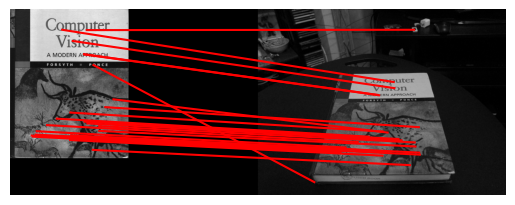

In [6]:
# Feel free to play around with these parameters
# BUT when submitting the report use the original images
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"
ratio = 0.7
sigma = 0.15

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

displayMatched(image1, image2, ratio, sigma)

### Q2.1.5 (10 points):

Experiment with different sigma and ratio values. Conduct a small ablation study, and include the figures displaying the matched features with various parameters in your write-up. Explain the effect of these two paremeters respectively.

---

Explain the effect of these two parameters: YOUR ANSWER HERE...

---

In [ ]:
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# ===== your code here! =====
# Experiment with different sigma and ratio values.
# Use displayMatches to visualize.
# Include the matched feature figures in the write-up.

# ==== end of code ====

### Q2.1.6 (10 points):

#### Implement the function briefRot

In [ ]:
def briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Tests Brief with rotations.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    # Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # ===== your code here! =====
        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Match features in images

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

        # ==== end of code ====

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_MATCHES_PATH, matches_to_save)

def dispBriefRotHist(matches_path=ROT_MATCHES_PATH):
    # Check if pickle file exists
    if not os.path.exists(matches_path):
      raise RuntimeError('matches_path does not exist. did you call briefRot?')

    # Read from pickle file
    match_counts, match_degrees, deg_inc = read_pickle(matches_path)

    # Display histogram
    # Bins are centered and separated every 10 degrees
    plt.figure()
    bins = [x - deg_inc/2 for x in match_degrees]
    bins.append(bins[-1] + deg_inc)
    plt.hist(match_degrees, bins=bins, weights=match_counts, log=True)
    #plt.hist(match_degrees, bins=[10 * (x-0.5) for x in range(37)], weights=match_counts, log=True)
    plt.title("Histogram of BREIF matches")
    plt.ylabel("# of matches")
    plt.xlabel("Rotation (deg)")
    plt.tight_layout()

    output_path = os.path.join(RES_DIR, 'histogram.png')
    plt.savefig(output_path)

#### Visualize the matches under rotation

See debugging tips in handout.


In [ ]:
# defaults are:
# min_deg = 0
# max_deg = 360
# deg_inc = 10
# ratio = 0.7
# sigma = 0.15
# filename = 'cv_cover.jpg'

# Controls the rotation degrees
min_deg = 0
max_deg = 360
deg_inc = 10

# Brief feature descriptor and Fast feature detector paremeters
# (change these if you want to use different values)
ratio = 0.7
sigma = 0.15

# image to rotate and match
# (no need to change this but can if you want to experiment)
filename = 'cv_cover.jpg'

# Call briefRot
briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename)

#### Plot the histogram

See debugging tips in handout.

In [ ]:
dispBriefRotHist()

---

Explain why you think the BRIEF descriptor behves this way: YOUR ANSWER HERE...

---

### Q2.1.7.1 (Extra Credit - 5 points):

Design a fix to make BRIEF more rotation invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.

In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Feel free to modify the inputs and the function body as necessary
# This is only an outline
def briefRotInvEc(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Rotation invariant Brief.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Brief matcher that is rotation invariant
        # Feel free to define additional helper functions as necessary

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_INV_MATCHES_PATH, matches_to_save)

# ==== end of code ====

#### Visualize your implemented function


In [ ]:
min_deg = 0
max_deg = 360
deg_inc = 10
filename = 'cv_cover.jpg'

# ===== your code here! =====
# TODO: Call briefRotInvEc and visualize

# ==== end of code ====


#### Plot Histogram

In [ ]:
dispBriefRotHist(matches_path=ROT_INV_MATCHES_PATH)

---

Compare the histograms with an without rotation invariance. Explain your rotation invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---

### Q2.1.7.2 (Extra Credit - 5 points):

Design a fix to make BRIEF more scale invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.


In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Modify the inputs and the function body as necessary
def briefScaleInvEc(ratio, sigma, filename):

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_scales = [] # stores the scaling factors
    match_counts = [] # stores the number of matches at each scaling factor

    for i in [1]:
        # Scale Image
        image_scale = cv2.resize(image,(int(image.shape[1]/(2**i)),
                                        int(image.shape[0]/(2**i))),
                                 interpolation = cv2.INTER_AREA)

        # TODO: Brief matcher that is scale invariant
        # Feel free to define additional helper functions as necessary

        # Compare to regular matchPics
        matches_orig, locs1_orig, locs2_orig = matchPics(image,
                                                         image_scale,
                                                         ratio, sigma)

        print('plotting non-scale invariant scale: ', 2**i)
        plotMatches(image, image_scale, matches_orig, locs1_orig,
                    locs2_orig)
        print('plotting scale-invariant: ', 2**i)
        plotMatches(image, image_scale, matches, locs1, locs2)

# ==== end of code ====

#### Visualize your implemented function

In [ ]:
# ===== your code here! =====
# TODO: Call briefScaleInvEc and visualize
# You may change any parameters and the function body as necessary

filename = 'cv_cover.jpg'

ratio = 0.7
sigma = 0.15

briefScaleInvEc(ratio, sigma, filename)
# ==== end of code ====

---

Explain your scale invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---


## Q2.2 Homography Computation

### Q2.2.1 (15 Points):

Implement the function computeH

In [ ]:
def computeH(x1, x2):
    """
    Compute the homography between two sets of points

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    if x1.shape != x2.shape:
        raise RuntimeError('number of points do not match')

    # ===== your code here! =====
    # TODO: Compute the homography between two sets of points

    # ==== end of code ====

    return H2to1

### Q2.2.2 (10 points):

Implement the function computeH_norm

In [ ]:
def computeH_norm(x1, x2):
    """
    Compute the homography between two sets of points using normalization

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    # ===== your code here! =====

    # TODO: Compute the centroid of the points


    # TODO: Shift the origin of the points to the centroid


    # TODO: Normalize the points so that the largest distance from the
    # origin is equal to sqrt(2)


    # TODO: Similarity transform 1


    # TODO: Similarity transform 2


    # TODO: Compute homography


    # TODO: Denormalization

    # ==== end of code ====

    return H2to1

### Q2.2.3 (25 points):

Implement RANSAC

In [ ]:
def computeH_ransac(locs1, locs2, max_iters, inlier_tol):
    """
    Estimate the homography between two sets of points using ransac

    Input
    -----
    locs1, locs2: Lists of points
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    bestH2to1: 3x3 homography matrix that best transforms locs2 to locs1
    inliers: indices of RANSAC inliers

    """

    # ===== your code here! =====

    # TODO:
    # Compute the best fitting homography using RANSAC
    # given a list of matching points locs1 and loc2

    # ==== end of code ====

    return bestH2to1, best_inliers

### Q2.2.4 (10 points):

#### Implement the function compositeH

In [ ]:
def compositeH(H2to1, template, img):
    """
    Returns the composite image.

    Input
    -----
    H2to1: Homography from image to template
    template: template image to be warped
    img: background image

    Returns
    -------
    composite_img: Composite image

    """

    # ===== your code here! =====
    # TODO: Create a composite image after warping the template image on top
    # of the image using the homography

    # ==== end of code ====

    return composite_img

#### Implement the function warpImage

In [ ]:
def warpImage(ratio, sigma, max_iters, inlier_tol):
    """
    Warps hp_cover.jpg onto the book cover in cv_desk.png.

    Input
    -----
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    """

    hp_cover = skimage.io.imread(os.path.join(DATA_DIR, 'hp_cover.jpg'))
    cv_cover = skimage.io.imread(os.path.join(DATA_DIR, 'cv_cover.jpg'))
    cv_desk = skimage.io.imread(os.path.join(DATA_DIR, 'cv_desk.png'))
    cv_desk = cv_desk[:, :, :3]

    # ===== your code here! =====

    # TODO: match features between cv_desk and cv_cover using matchPics

    # TODO: Scale matched pixels in cv_cover to size of hp_cover

    # TODO: Get homography by RANSAC using computeH_ransac

    # TODO: Overlay using compositeH to return composite_img
    composite_img = None

    # ==== end of code ====

    plt.imshow(composite_img)
    plt.show()

#### Visualize composite image

In [ ]:
# defaults are:
# ratio = 0.7
# sigma = 0.15
# max_iters = 600
# inlier_tol = 1.0

# (no need to change this but can if you want to experiment)
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

warpImage(ratio, sigma, max_iters, inlier_tol)

### Q2.2.5 (10 points):

Conduct ablation study with various max_iters and inlier_tol values. Plot the result images and explain the effect of these two parameters respectively.

In [ ]:
# ===== your code here! =====
# Experiment with different max_iters and inlier_tol values.
# Include the result images in the write-up.

# ==== end of code ====

---

Explain the effect of max_iters and inlier_tol: YOUR ANSWER HERE...

---

# Q3 Create a Simple Panorama

## Q3.1 Create a panorama (10 points):

#### Implement the function createPanorama

In [ ]:
def createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol):
    """
    Create a panorama augmented reality application by computing a homography
    and stitching together a left and right image.

    Input
    -----
    left_im: left image
    right_im: right image
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    panorama_im: Stitched together panorama

    """

    # ===== your code here! =====
    # TODO: match features between images
    # This can be done using matchPics, cpselect, or any other function.

    # TODO: Get homography by RANSAC using computeH_ransac

    # TODO: Stich together the two images
    # Requires the use of cv2.warpPerspective
    panorama_im = None

    # ==== end of code ====

    return panorama_im.astype(np.uint8)

#### Visualize Panorama

Make sure to use **your own images** and **include them as well as the result** in the report.

In [ ]:
left_im_path = os.path.join(DATA_DIR, 'pano_left.jpg')
left_im = skimage.io.imread(left_im_path)
right_im_path = os.path.join(DATA_DIR, 'pano_right.jpg')
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)

plt.imshow(panorama_im)
plt.axis('off')
plt.show()